In [1]:
import graphlab as gl

from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
musicdata = "./dataset/amazon5core/digitalmusic/10ksample.csv"
healthdata = "./dataset/amazon5core/healthcare/10ksample.csv"

# loading data using gl
musicsf = gl.SFrame.read_csv(musicdata, delimiter=",",
                             usecols=["asin","reviewerID","overall","reviewText"],
                             column_type_hints=[str, str, int, str])

# healthsf = gl.SFrame.read_csv(healthdata, delimiter=",",
#                               usecols=["asin","reviewerID","overall","reviewText"],
#                               column_type_hints=[str, str, int, str])

This non-commercial license of GraphLab Create for academic use is assigned to rahulbali.mecse16@pec.edu.in and will expire on November 23, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\cramdog\AppData\Local\Temp\graphlab_server_1529684897.log.0


Finished parsing file E:\ACADEMICS\PEC---\ME 4 SEM\code\graph-code\dataset\amazon5core\digitalmusic\10ksample.csv

Parsing completed. Parsed 10000 lines in 0.34932 secs.

In [3]:
# divide the review and rating data
ratings = musicsf[["asin", "reviewerID", "overall"]]
reviews = musicsf[["asin", "reviewerID", "reviewText"]]


# ratings = healthsf[["asin", "reviewerID", "overall"]]
# reviews = healthsf[["asin", "reviewerID", "reviewText"]]

# train, test = gl.recommender.util.random_split_by_user(dataset=ratings,item_id="asin",user_id="reviewerID",max_num_users=100)

## cross validation structure
folds = gl.cross_validation.KFold(ratings, 10)
train, test = folds[3]


In [4]:
# train.show()
# gl.canvas.show()

In [31]:
## using recommender system lsa or svd

# outF = open("cross_val_score.txt", "w")

## random seed 22 is good.
shuffletrain = gl.cross_validation.shuffle(train, random_seed=22)

# for train, valid in folds:
model = gl.recommender.factorization_recommender.create(observation_data=train,
                                                        user_id="reviewerID",
                                                        item_id="asin",
                                                        target="overall",
                                                        num_factors=50, 
                                                        nmf=0, max_iterations=300,
                                                        solver='sgd',
                                                        verbose=1)
    
# print >> outF, model['coefficients']
# # view = model.views.overview(validation_set=)
# print >> outF, model.evaluate_precision_recall(dataset=valid)
# print >> outF, model.evaluate_rmse(valid, target='overall')
# print >> outF, "balibalibalibalibalibalibbalibbalibbalibalibali"

# out_rmse = model.evaluate_rmse(dataset=test, target='overall')
out_pr = model.evaluate_precision_recall(dataset=test, verbose=1)
print(out_pr.viewkeys())
print(out_pr['precision_recall_by_user'])
print(out_pr['precision_recall_overall']['precision'].sum())
# model.show()


# outF.close()

Recsys training: model = factorization_recommender

Preparing data set.

Data has 9000 observations with 3886 users and 2757 items.

Data prepared in: 0.069063s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 50       |

| regularization                 | L2 Regularization on Factors                     | 1e-008   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 300      |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 9000 / 9000 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | 0.141467                                 |

| 4       | 0.195312          | 0.275614                                 |

| 5       | 0.0976562         | 0.355467                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.390625          | 0.141467                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.18749           | 1.08972               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 34.03ms      | 1.40198           | 1.18404               | 0.390625    |

| 2       | 54.049ms     | 0.801063          | 0.895015              | 0.232267    |

| 3       | 65.057ms     | 0.509942          | 0.714097              | 0.171364    |

| 4       | 71.063ms     | 0.323693          | 0.568935              | 0.116134    |

| 5       | 89.081ms     | 0.222969          | 0.472189              | 0.098237    |

| 6       | 115.104ms    | 0.163442          | 0.404271              | 0.0856819   |

| 11      | 248.227ms    | 0.0531758         | 0.230573              | 0.0543824   |

| 51      | 1.04s        | 0.00351294        | 0.0591238             | 0.0172117   |

| 100     | 2.00s        | 0.00107323        | 0.0324822             | 0.0103873   |

| 101     | 2.01s        | 0.00105451        | 0.0321926             | 0.0103101   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 0.000344692

Final training RMSE: 0.0180596

dict_keys(['precision_recall_overall', 'precision_recall_by_user'])
+--------+-------------------+------------------+
| cutoff |     precision     |      recall      |
+--------+-------------------+------------------+
|   1    |        0.0        |       0.0        |
|   2    |        0.0        |       0.0        |
|   3    | 0.000822030415125 | 0.00246609124538 |
|   4    | 0.000616522811344 | 0.00246609124538 |
|   5    | 0.000493218249075 | 0.00246609124538 |
|   6    | 0.000411015207563 | 0.00246609124538 |
|   7    | 0.000352298749339 | 0.00246609124538 |
|   8    | 0.000308261405672 | 0.00246609124538 |
|   9    | 0.000274010138375 | 0.00246609124538 |
|   10   | 0.000246609124538 | 0.00246609124538 |
+--------+-------------------+------------------+
[18 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
0.00558227966752


In [6]:
# params = dict([('target', 'overall'),('observation_data', 'train'),('user_id', "reviewerID"),('item_id', "asin"),('target', "overall"),
#                                                 ('num_factors', 10),('solver', 'als'),('verbose', '1')])

# def evaluator1(model, train, valid):
#     targets = valid['overall']
#     return graphlab.evaluation.f1_score(targets, predictions,average = 'micro')

# job = gl.cross_validation.cross_val_score(folds,gl.recommender.factorization_recommender.create,params, evaluator=evaluator1)
# # # print >> outF, job.get_results()

# print(job.get_results())
# outF.close()

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.job: Creating a LocalAsync environment called 'async'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Cross-Validation-Jun-22-2018-21-58-36-806000-87955429' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Cross-Validation-Jun-22-2018-21-58-36-806000-87955429' scheduled.
[INFO] graphlab.deploy._job: Waiting for job to finish, this may take quite a while.
[INFO] graphlab.deploy._job: You may CTRL-C to stop this command and it will not cancel your job.


OrderedDict([('models', None), ('summary', Columns:
	parameters	float
	metric	float
	metadata	float

Rows: 0

Data:
	[])])


In [7]:
# recs = model.recommend(users=["AFNCXMCX7VZWH"])

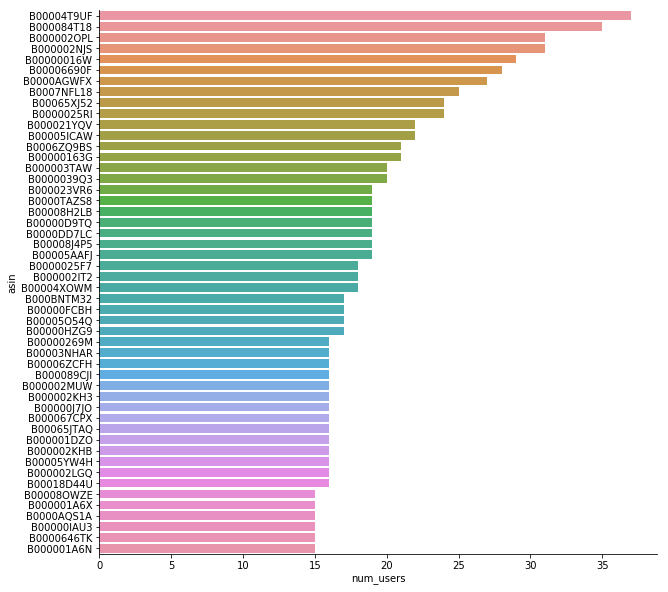

In [23]:
# coeff = model['coefficients']['reviewerID']['factors']

# python method list
methods = [method_name for method_name in dir(model) if callable(getattr(model, method_name))]
# print(coeff)

# print(model.summary)

userPitem = model.get_num_users_per_item()
itemPuser = model.get_num_items_per_user()

userPitem = userPitem.to_dataframe()
itemPuser = itemPuser.to_dataframe()

# itemPuser = itemPuser.sort_values("num_items", ascending=False, kind='mergesort')
userPitem = userPitem.sort_values("num_users", ascending=False, kind='mergesort')
# print(itemPuser)

# sb.barplot(userPitem['asin'], userPitem['num_users']) #Variable Plot

plt.figure(figsize=(10,10))
# sb.barplot(y='reviewerID', x='num_items', data=itemPuser.head(50))
sb.barplot(y='asin', x='num_users', data=userPitem.head(50))
sb.despine()

In [ ]:
# using topic modelling

textdata1 = reviews['reviewText']

# texttrain, texttest = train_test_split(textdata1, test_size = 0.2)
# reviewfolds = gl.cross_validation.KFold(textdata1, 10)
# texttrain, texttest = reviewfolds[1]

review_docs = gl.text_analytics.count_words(textdata1)
review_docs = review_docs.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)

texttrain, texttest = gl.text_analytics.random_split(review_docs, prob=0.4)

# review_test = gl.text_analytics.count_words(texttest)
# review_test = review_docs.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)

# gl.text_analytics.trim_rare_words()

# texttrainframe = texttrain.to_dataframe()

# series = texttrainframe.iloc[:,0]
# listseries = []
# for i in series:
#     listseries.append(i)
    
# listseries
    
# # series2 = gl.SArray(listseries, dtype=dict)
# type(texttrainframe)


# texttrain = series2.to_dict()
# texttrain = series2.to_dict()



lda = gl.topic_model.create(dataset=texttrain, validation_set=texttest, num_topics=100, num_iterations=200, verbose=1)

lda


In [ ]:
lda.get_topics()